In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('merged_stock_sentiment_data1.csv',parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              245 non-null    datetime64[ns]
 1   Open              245 non-null    float64       
 2   High              245 non-null    float64       
 3   Low               245 non-null    float64       
 4   Adjusted Close    245 non-null    float64       
 5   Volume            245 non-null    int64         
 6   Daily Return      244 non-null    float64       
 7   Average_Compound  245 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 15.4 KB


In [27]:
df.describe()

,Open,High,Low,Adjusted Close,Volume,Daily Return,Average_Compound
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,244.000000,245.000000
mean,186.448041,188.086245,184.874735,186.140709,6.059381e+07,-0.000735,0.090562
std,15.594457,15.767412,15.228362,15.650301,2.459044e+07,0.013942,0.063315
min,165.350006,166.399994,164.080002,164.776505,2.404830e+07,-0.067729,-0.187162
25%,175.070007,176.899994,173.539993,174.768784,4.747140e+07,-0.007942,0.053517
50%,183.419998,184.899994,181.589996,183.131607,5.428830e+07,-0.001550,0.094357
75%,192.009995,193.000000,190.830002,191.914474,6.606290e+07,0.007464,0.131502
max,236.479996,237.229996,233.089996,234.820007,2.464214e+08,0.042598,0.301945


In [3]:
df.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Adjusted Close      0
Volume              0
Daily Return        1
Average_Compound    0
dtype: int64

In [4]:
df=df.dropna(axis=0)

In [ ]:
Q1=df['Adjusted Close'].quant(0.25)
Q3=df['Adjusted Close'].quant(0.75)
IQR=Q3-Q1
df=df[[~((df['Adjusted Close']<(Q1-1.5*IQR))|(df['Adjusted Close']>(Q3 + 1.5*IQR)))]]


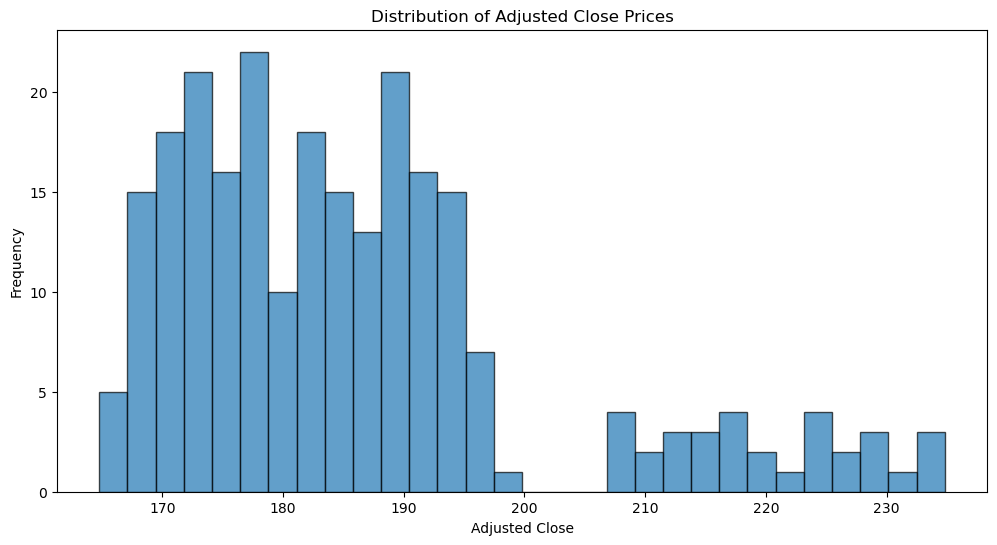

In [8]:
# Histogram of Adjusted Close Prices
plt.figure(figsize=(12, 6))
plt.hist(df['Adjusted Close'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close')
plt.ylabel('Frequency')
plt.show()

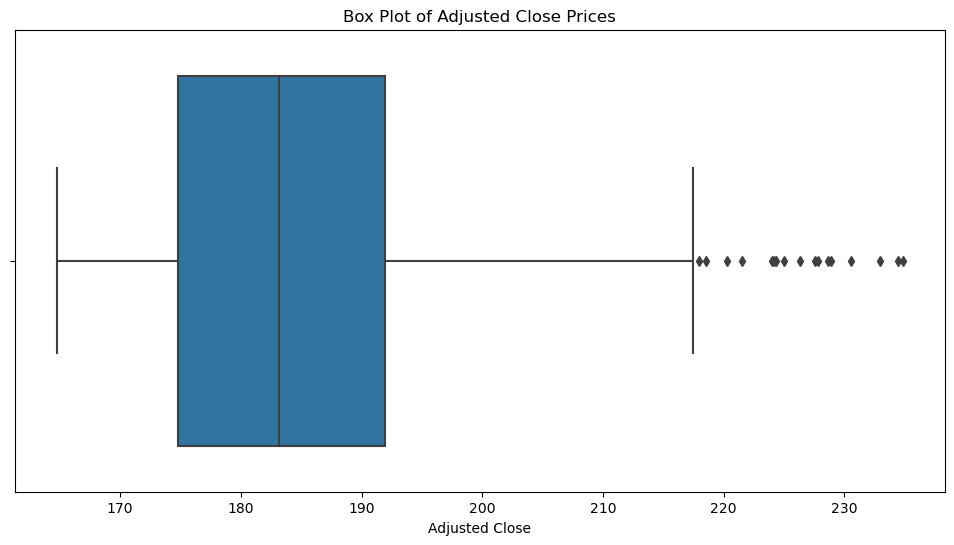

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Adjusted Close'])
plt.title('Box Plot of Adjusted Close Prices')
plt.xlabel('Adjusted Close')
plt.show()

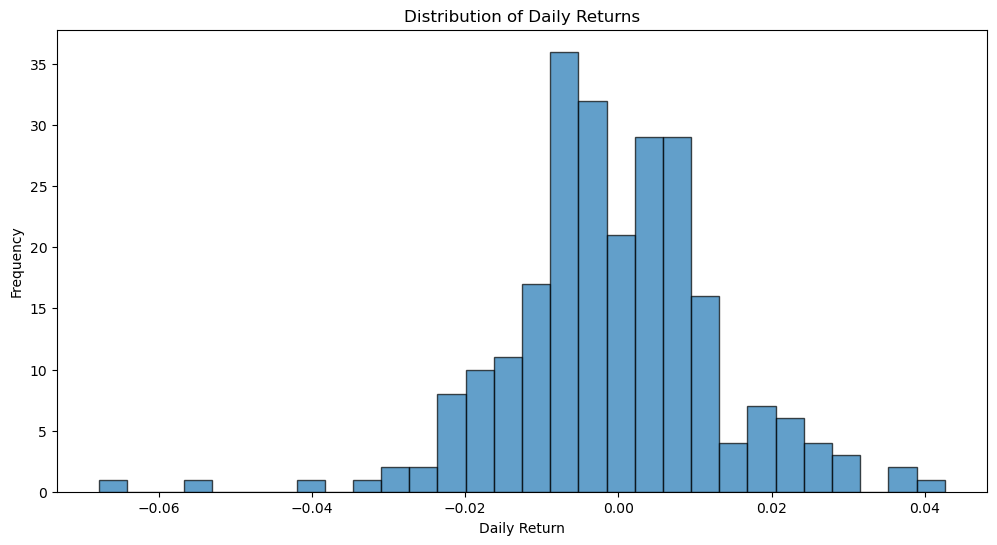

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(df['Daily Return'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

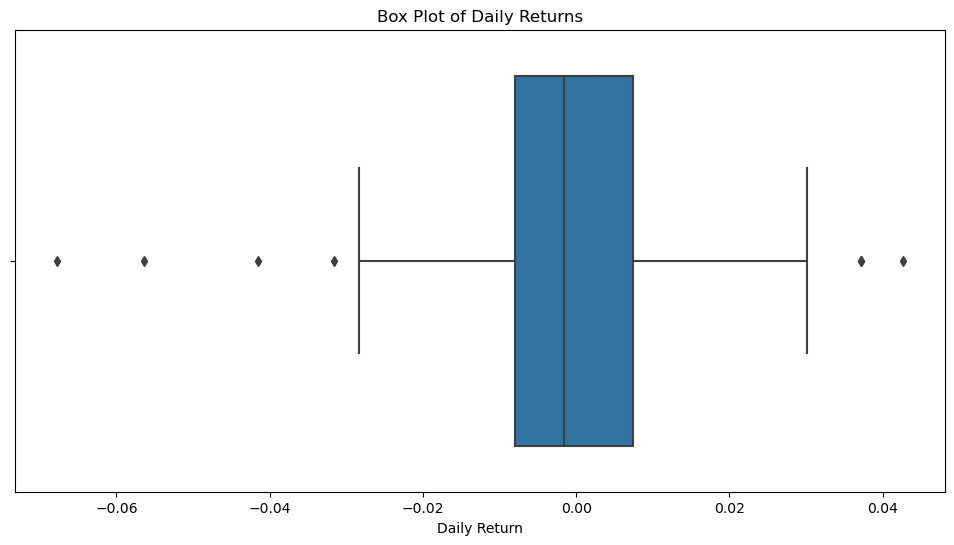

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Daily Return'])
plt.title('Box Plot of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

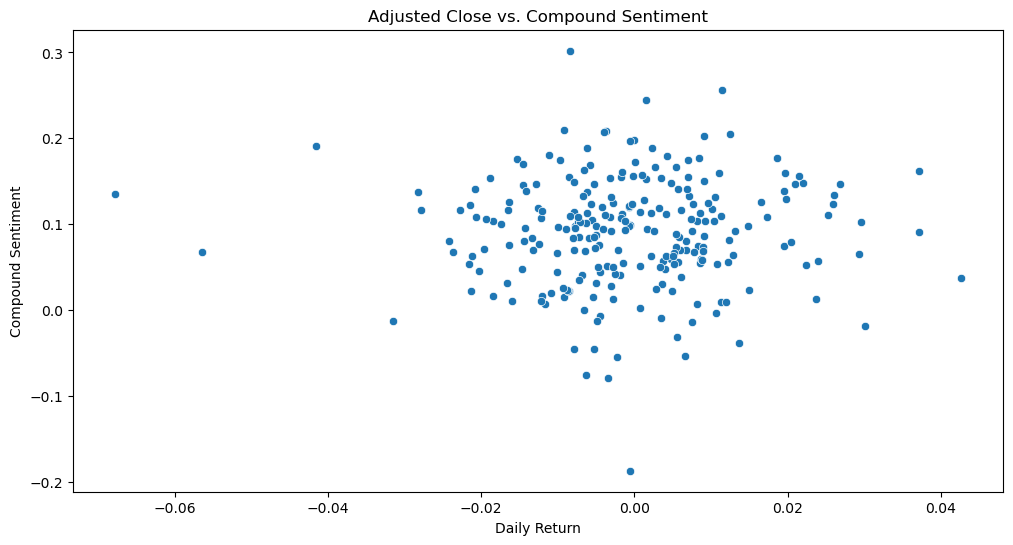

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Daily Return', y='Average_Compound', data=df)
plt.title('Adjusted Close vs. Compound Sentiment')
plt.xlabel('Daily Return')
plt.ylabel('Compound Sentiment')
plt.show()

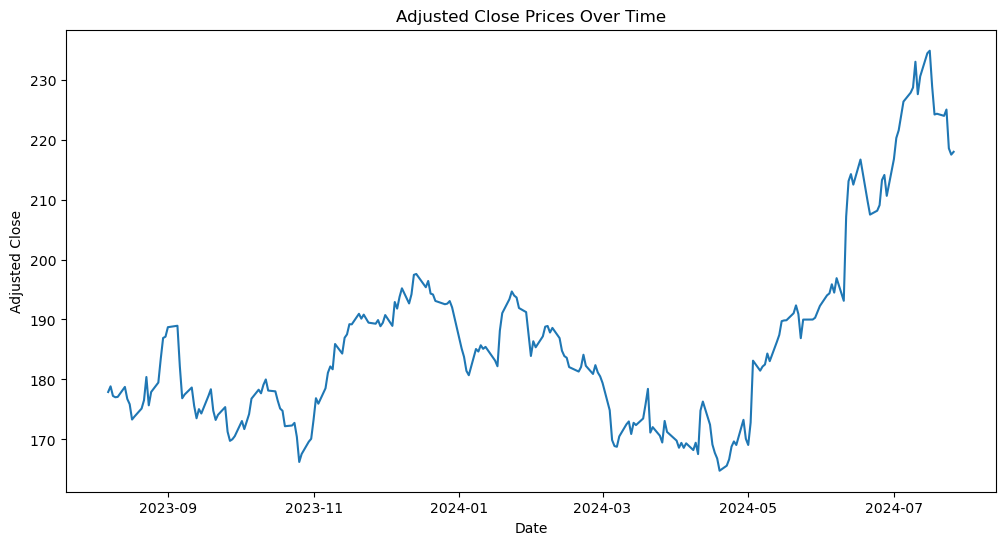

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adjusted Close'])
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.show()

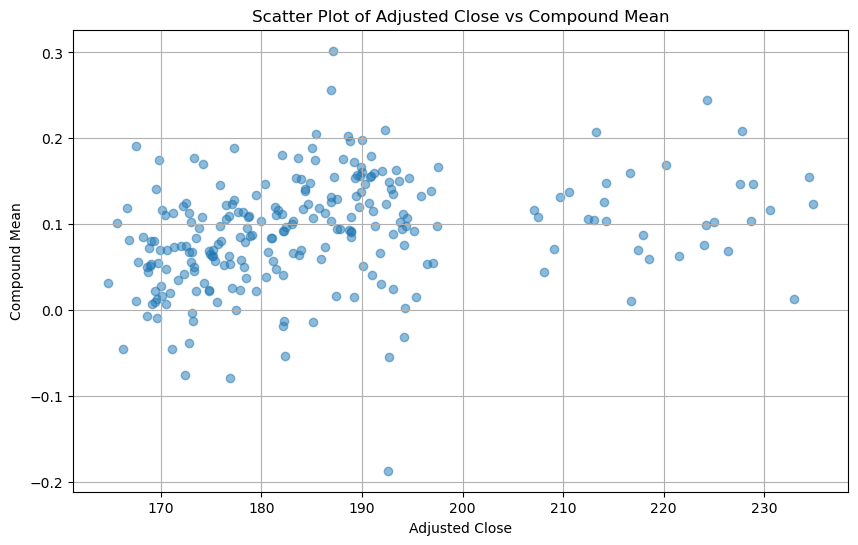

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Adjusted Close'], df['Average_Compound'], alpha=0.5)
plt.title('Scatter Plot of Adjusted Close vs Compound Mean')
plt.xlabel('Adjusted Close')
plt.ylabel('Compound Mean')
plt.grid(True)
plt.show()

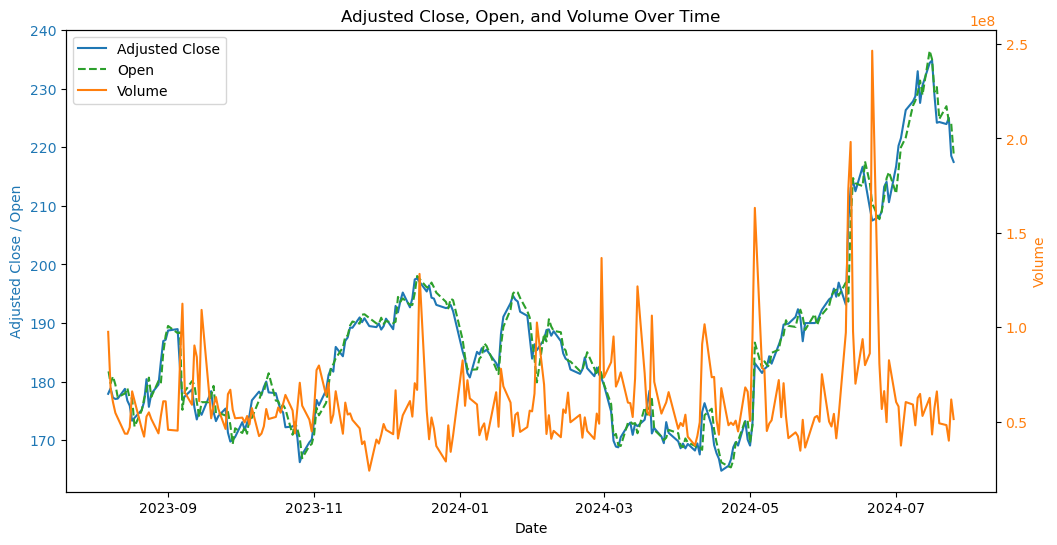

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Adjusted Close
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close / Open', color='tab:blue')
ax1.plot(df['Date'], df['Adjusted Close'], color='tab:blue', label='Adjusted Close')
ax1.plot(df['Date'], df['Open'], color='tab:green', linestyle='--', label='Open')
ax1.tick_params(axis='y', labelcolor='tab:blue')


# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.plot(df['Date'], df['Volume'], color='tab:orange', label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


# Adding a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Adjusted Close, Open, and Volume Over Time')
plt.show()

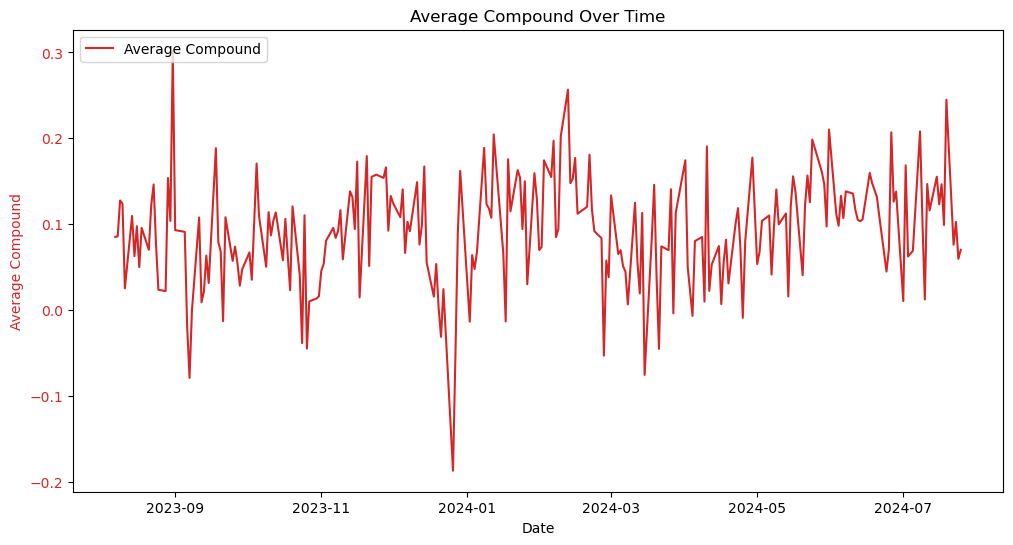

In [10]:
fig, ax3 = plt.subplots(figsize=(12, 6))
ax3.set_xlabel('Date')
ax3.set_ylabel('Average Compound', color='tab:red')
ax3.plot(df['Date'], df['Average_Compound'], color='tab:red', label='Average Compound')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Adding a legend
ax3.legend(loc='upper left')

plt.title('Average Compound Over Time')
plt.show()


In [33]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['Adjusted Close', 'Average_Compound']], maxlag=[6])


Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.5064  , p=0.0229  , df_denom=225, df_num=6
ssr based chi2 test:   chi2=15.9070 , p=0.0143  , df=6
likelihood ratio test: chi2=15.3980 , p=0.0174  , df=6
parameter F test:         F=2.5064  , p=0.0229  , df_denom=225, df_num=6


{6: ({'ssr_ftest': (2.506352117540298, 0.02285155347235685, 225.0, 6),
   'ssr_chi2test': (15.906981439322426, 0.014262039826142374, 6),
   'lrtest': (15.397960129438161, 0.017377355172019226, 6),
   'params_ftest': (2.50635211754024, 0.02285155347235973, 225.0, 6.0)},
   array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [39]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['Low', 'Average_Compound']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9380  , p=0.0024  , df_denom=234, df_num=3
ssr based chi2 test:   chi2=15.2572 , p=0.0016  , df=3
likelihood ratio test: chi2=14.7937 , p=0.0020  , df=3
parameter F test:         F=4.9380  , p=0.0024  , df_denom=234, df_num=3


{3: ({'ssr_ftest': (4.938014250052423, 0.002414511576737239, 234.0, 3),
   'ssr_chi2test': (15.257197875161971, 0.0016095386965359615, 3),
   'lrtest': (14.79370928657022, 0.002001700180947063, 3),
   'params_ftest': (4.938014250052327, 0.00241451157673758, 234.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [55]:
correlation = df['Low'].corr(df['Average_Compound'])
print(f'Correlation between Adjusted Close and Open: {correlation}')

Correlation between Adjusted Close and Open: 0.2805974158584485


In [57]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['Open', 'Average_Compound']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6544  , p=0.0105  , df_denom=240, df_num=1
ssr based chi2 test:   chi2=6.7376  , p=0.0094  , df=1
likelihood ratio test: chi2=6.6459  , p=0.0099  , df=1
parameter F test:         F=6.6544  , p=0.0105  , df_denom=240, df_num=1


{1: ({'ssr_ftest': (6.654406441611482, 0.010487263832308738, 240.0, 1),
   'ssr_chi2test': (6.737586522131626, 0.009440225484866034, 1),
   'lrtest': (6.645872449075796, 0.009938579817102054, 1),
   'params_ftest': (6.654406441611477, 0.010487263832308738, 240.0, 1.0)},
   array([[0., 1., 0.]])])}

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [37]:
X = df[['Daily Return', 'Average_Compound','Open','Low','Volume']]
y = df['High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(49, 5)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM LINEAR KERNEL

In [39]:
model = SVR(kernel='linear') 
model.fit(X_train_scaled, y_train)
print("Model training complete.")

Model training complete.


In [40]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

Training MSE: 1.1922
Testing MSE: 2.5399
Training R^2: 0.9947
Testing R^2: 0.9917


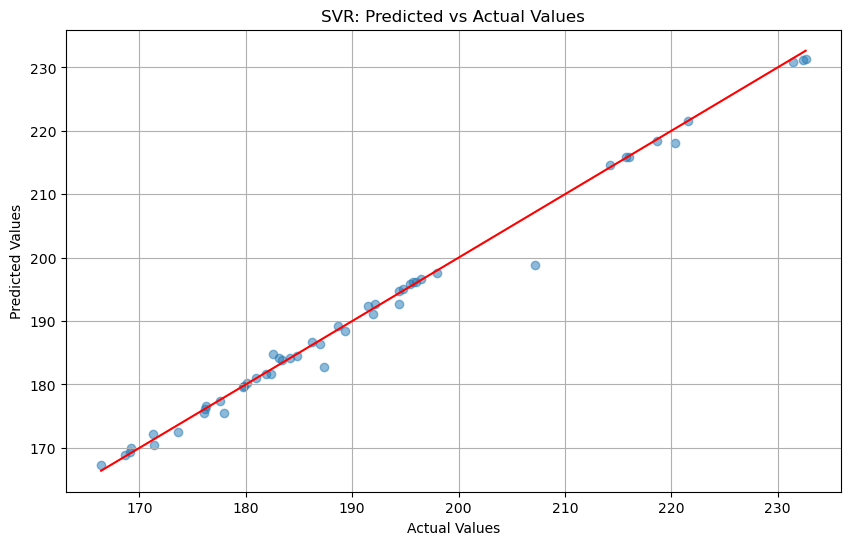

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('SVR: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

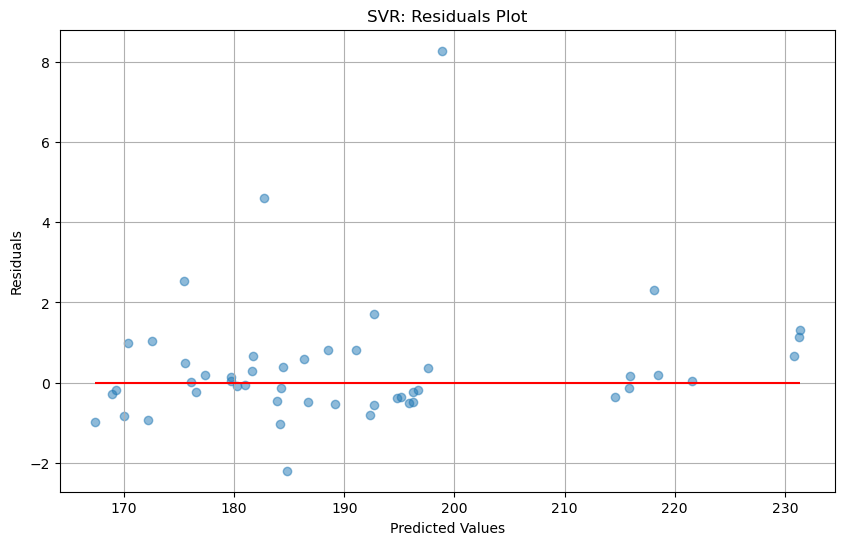

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red')
plt.title('SVR: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## SVM POLYNOMIAL

In [43]:
model = SVR(kernel='poly') 
model.fit(X_train_scaled, y_train)
print("Model training complete.")

Model training complete.


In [44]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

Training MSE: 44.6066
Testing MSE: 95.8466
Training R^2: 0.8026
Testing R^2: 0.6866


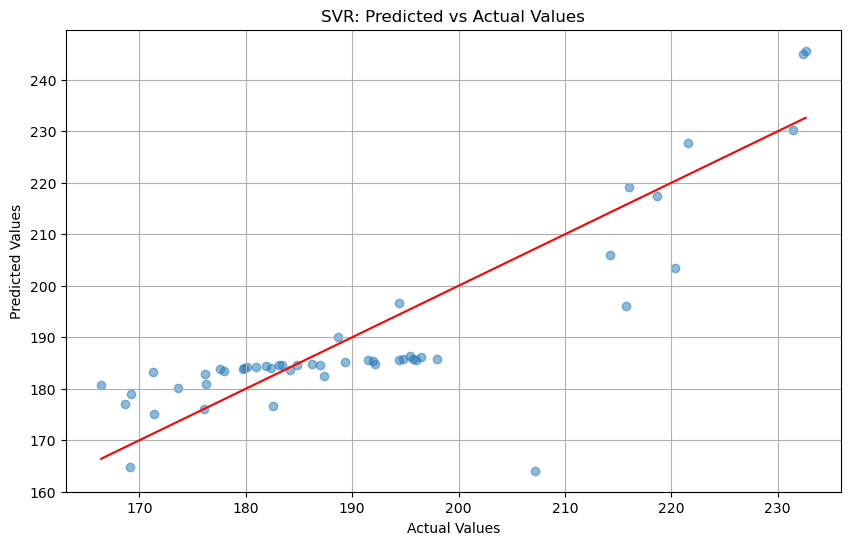

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('SVR: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

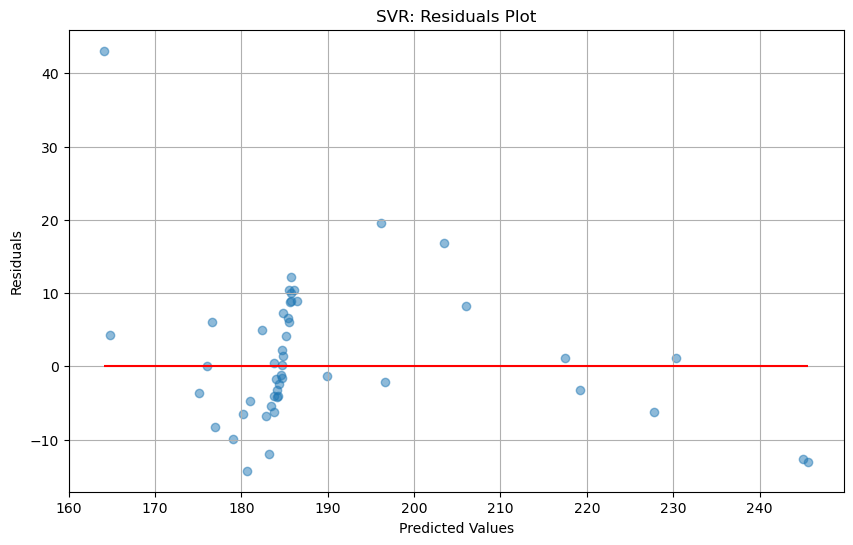

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red')
plt.title('SVR: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## SVM SIGMOID

In [47]:
model = SVR(kernel='sigmoid') 
model.fit(X_train_scaled, y_train)
print("Model training complete.")

Model training complete.


In [48]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

Training MSE: 70.0167
Testing MSE: 120.2884
Training R^2: 0.6901
Testing R^2: 0.6067


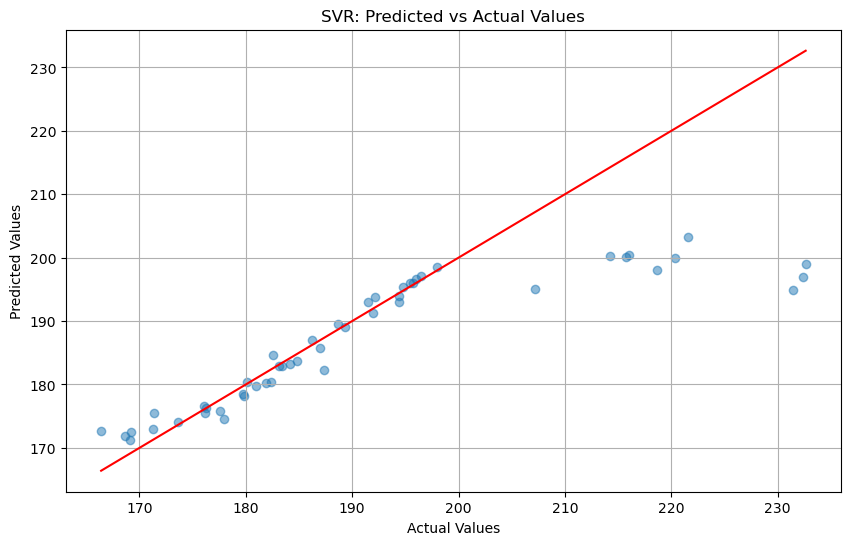

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('SVR: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

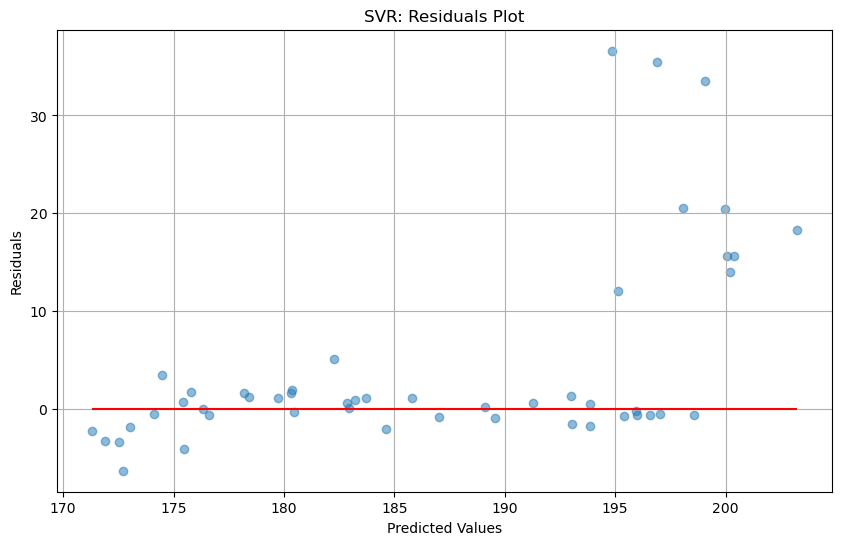

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red')
plt.title('SVR: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## SVM RBF

In [53]:
model = SVR(kernel='rbf') 
model.fit(X_train_scaled, y_train)
print("Model training complete.")

Model training complete.


In [54]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

Training MSE: 85.4440
Testing MSE: 139.2604
Training R^2: 0.6219
Testing R^2: 0.5446


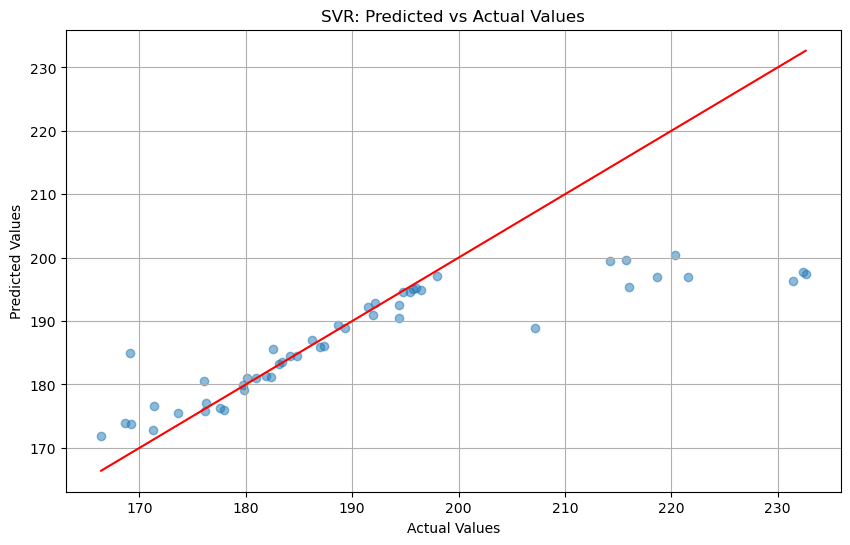

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('SVR: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

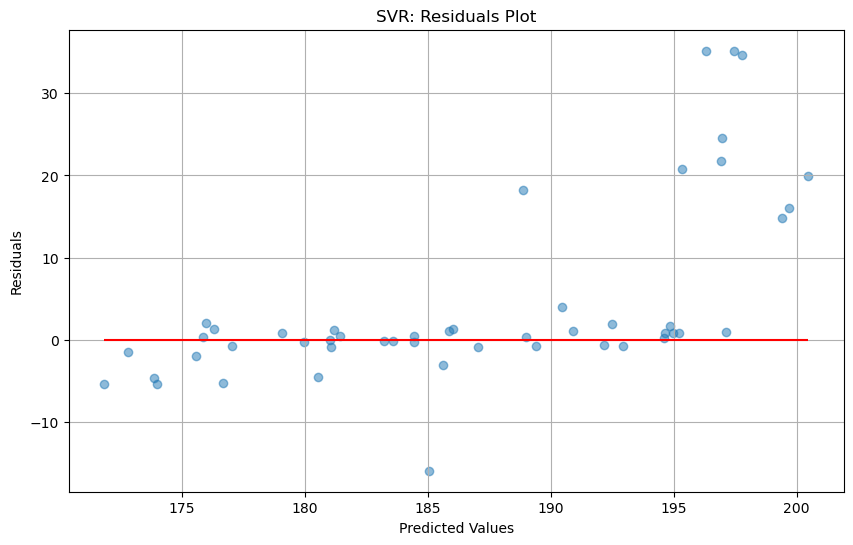

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red')
plt.title('SVR: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Linear Regression

In [58]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training complete.")
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

Model training complete.


In [59]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

Training MSE: 1.1459
Testing MSE: 2.3627
Training R^2: 0.9949
Testing R^2: 0.9923


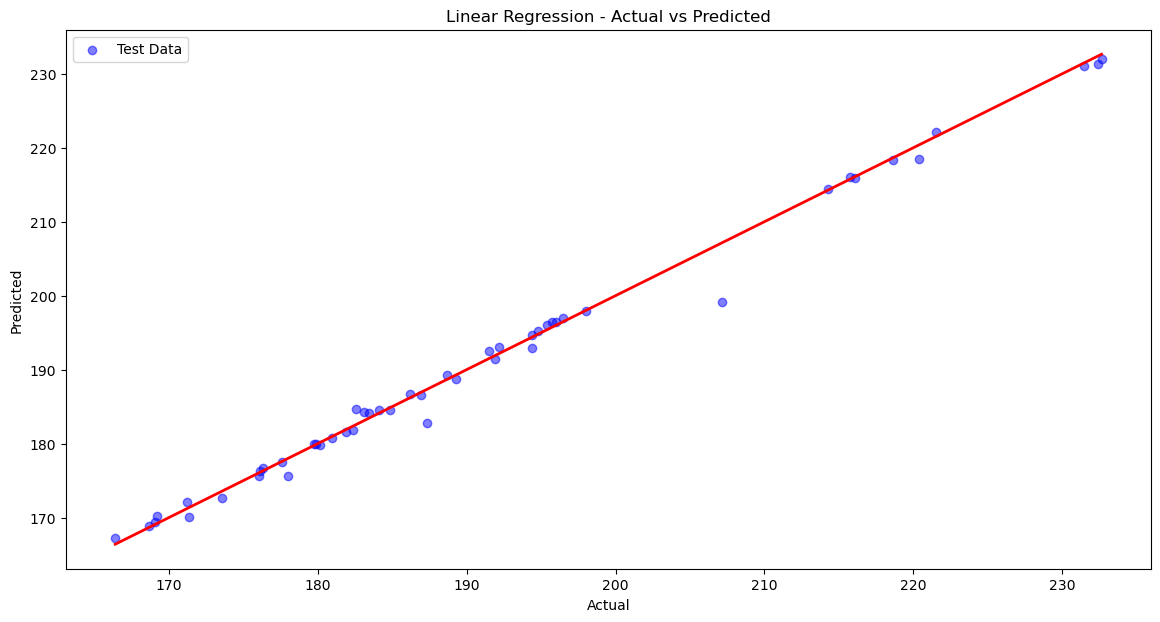

In [60]:
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

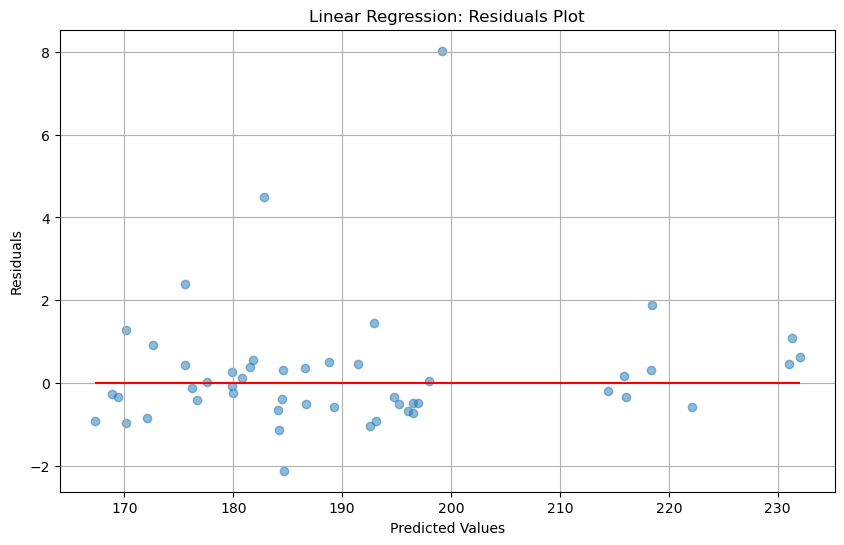

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5)
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red')
plt.title('Linear Regression: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
joblib.dump(model, 'svr_model.pkl')
print("Model saved as svr_model.pkl")

In [ ]:
results_df = pd.DataFrame({
    'Date': df.index[len(X_train):],  # Adjust this index range based on your split
    'Actual': y_test,
    'Predicted': y_test_pred
})
results_df.to_csv('svr_predictions.csv', index=False)
print("Predictions saved to svr_predictions.csv")